**Nom** : LOUA  
**Prenom** : PIVOT REMY  



**TD - TP 4 Segmentation d’images microscopiques**   
Ce TP a pour objectif de segmenter des images microscopiques par le biais de l’algorithme  
d’apprentissage « RandomForestRegressor ». Vous travaillerez sur les images « sandstone ».

# A) Prise en main des images
Vous êtes amenés à travailler sur les données disponibles dans les deux fichiers comprimés :   
« Train_images.zip » et « Train_masks.zip ». Analysez le contenu de ces fichiers.

# B) Extraction des attributs et preparation du jeu de données

## Importez les bonnes librairies 

In [1]:
import numpy as np 
import cv2 
import pandas as pd 

## Lisez l’mage sandstone000.tif

In [2]:
img = cv2.imread('Train_images/sandstone_Versa0000.tif')

In [3]:
img.shape

(1024, 996, 3)

Convertissez cette image RGB en niveau de gris

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Transformez cette image en un signal 1D

In [5]:
Img2 =img.reshape(-1) # 1D

la ligne ci-dessus permet de mettre les données de l'images sur une colonnes, donc la taille sera juste size(ligne)*size(colonne)

## Préparation du jeu de données d’entrainement dans le date frame « df »

### Commentez les lignes de code ci-dessous

In [6]:
df = pd. DataFrame()  # creation d'un dataframe pandas, un cadre de données
df['Original Imag'] = Img2 # on ajoute une colonne dans notre cadre contenant les données de Img2

In [7]:
print(df.head) 

<bound method NDFrame.head of          Original Imag
0                    0
1                    0
2                    0
3                    0
4                    0
...                ...
1019899              0
1019900              0
1019901              0
1019902              0
1019903              0

[1019904 rows x 1 columns]>


### attributs de l'image sandstone000.tif

On souhaite ajouter des attributs de l’image sandstone000.tif’ en lui appliquant diverses  
opérations de filtrage de Gabor. Commentez le code ci-dessous

In [8]:
num = 1 # compteur pour l'etiquete de bloc de données
kernels = []
for theta in range(2):  # nombre theta
    theta = theta / 4. * np.pi
    for sigma in (1, 3): # sigma prend 1 et 3
        for lamda in np.arange(0, np.pi, np.pi / 4):
            for gamma in (0.05, 0.5): # gamma prend 0.05 et 0.5
                gabor_label = 'Gabor' + str(num) # label gabor 
                print(gabor_label)
                ksize = 9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta,
                                            lamda, gamma, 0, ktype=cv2.CV_32F)
                kernels.append(kernel)
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel) # filtrage de l'image
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img # Mettre les données filtrées dans son étiquette correspondante
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=',
                    lamda, ': gamma=', gamma)
                num += 1 # incrementer le compteur d'étiquette 


Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14
Gabor14 : th

### On souhaite ajouter d’autres attributs. Commentez les lignes de code ci-dessous

In [9]:
edges = cv2.Canny(img, 100,200) # detection de contour avec valeur min=100 et valeur max=200
edges1 = edges.reshape(-1) # transforme edges en une matrice colonne 
df['Canny Edge'] = edges1 # ajoute une colonne contenant les données pour edges1

In [10]:
from skimage.filters import roberts, sobel, scharr, prewitt

In [11]:
edge_roberts = roberts(img) # detection de contour
edge_roberts1 = edge_roberts.reshape(-1) #transforme en une matrice colonne
df['Roberts'] = edge_roberts1 # ajoute une colonne contenant les données pour edge_roberts1

In [12]:
edge_sobel = sobel(img)  # detection de contours
edge_sobel1 = edge_sobel.reshape(-1) #transforme en une matrice colonne
df['Sobel'] = edge_sobel1  # ajoute une colonne contenant les données pour edge_sobel1

In [13]:
edge_scharr = scharr(img) 
edge_scharr1 = edge_scharr.reshape(-1) #transforme en une matrice colonne
df['Scharr'] = edge_scharr1 # on ajoute à notre tableau de df

In [14]:
edge_prewitt = prewitt(img)  # on fait un lissage suivie d'une derivé de l'image
edge_prewitt1 = edge_prewitt.reshape(-1) #transforme en une matrice colonne
df['Prewitt'] = edge_prewitt1 # on ajoute à notre tableau de df

In [15]:
from scipy import ndimage as nd 
from sklearn.preprocessing import LabelEncoder

In [16]:
gaussian_img = nd.gaussian_filter(img, sigma=3) 
gaussian_img1 = gaussian_img.reshape(-1) # ajoute une colonne contenant les données pour edge_sobel1
df['Gaussian s3'] = gaussian_img1 # on ajoute à notre tableau de df

In [17]:
gaussian_img2 = nd.gaussian_filter(img, sigma=7) 
gaussian_img3 = gaussian_img2.reshape(-1) # ajoute une colonne contenant les données pour edge_sobel1
df['Gaussian s7'] = gaussian_img3 # on ajoute à notre tableau de df

In [18]:

median_img = nd.median_filter(img, size=3) 
median_img1 = median_img.reshape(-1) # ajoute une colonne contenant les données pour edge_sobel1
df['Median s3'] = median_img1 # on ajoute à notre tableau de df

On souhaite compléter ce jeu de données par les labels. Commentez chacune des lignes de code 
ci-dessous

In [19]:
labeled_img = cv2.imread('Train_masks/Sandstone_Versa0000.tif')

In [20]:
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY) 
labeled_img1 = labeled_img.reshape(-1) 
df['Labels'] = labeled_img1  # colonne pour les Labels 

In [21]:
print(df.head())


   Original Imag  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0              0       0       0       0       0       0       0       0   
1              0       0       0       0       0       0       0       0   
2              0       0       0       0       0       0       0       0   
3              0       0       0       0       0       0       0       0   
4              0       0       0       0       0       0       0       0   

   Gabor8  Gabor9  ...  Gabor32  Canny Edge  Roberts  Sobel  Scharr  Prewitt  \
0       0       0  ...        0           0      0.0    0.0     0.0      0.0   
1       0       0  ...        0           0      0.0    0.0     0.0      0.0   
2       0       0  ...        0           0      0.0    0.0     0.0      0.0   
3       0       0  ...        0           0      0.0    0.0     0.0      0.0   
4       0       0  ...        0           0      0.0    0.0     0.0      0.0   

   Gaussian s3  Gaussian s7  Median s3  Labels  
0            

Attention : en regardant la colonnne labels, il faut laisser tomber tous les pixels avec des etiquêtes zeros, car celle ci nont pas de label

In [22]:
original_img_data = df.drop(labels = ["Labels"], axis=1)
df = df[df.Labels != 0]

In [23]:
#df.to_csv("GaborRem.csv")

on prepare notre jeu de données pour la prediction

In [24]:
Y = df["Labels"].values

In [25]:

Y = LabelEncoder().fit_transform(Y) # pour faciliter le tracé 

les variables

In [26]:
X = df.drop(labels = ["Labels"], axis=1) 

### Divisez le jeu de données 

Les attributs sont stockés dans la variable X, tandis que les labels sont stockés dans la variable 
Y

divisez ce jeu de données (X,Y) en deux parties : l'une pour l'entrainement (X_train, y_train) et l'autre   
pour le test X_test, y_test)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

## Entrainement du modèle

### model RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestClassifier 

In [30]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

### Entrainez le modèle

In [31]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Testez le modèle sur les données de test

In [46]:
print("Nous avons un score sur le Test set de : ",model.score(X_test,y_test))

Nous avons un score sur le Test set de :  0.9835425848485888


In [47]:
print("Nous avons un score sur le Train set de : ",model.score(X_train,y_train))

Nous avons un score sur le Train set de :  0.9999987743941524


Nous avons un score sur les données de test proche du score sur les données d'entrainnement, ce qui est bon pour nous  
car cela confirme qu'il n'ya pas de sur apprentissage

In [33]:
prediction = model.predict(X_test)

In [35]:
from sklearn import metrics

In [36]:
print ("Precision Random Forest= ", metrics.accuracy_score(y_test, prediction))

Precision Random Forest=  0.9835425848485888


### analysez la précision   
de la  prédiction sur les données d’entrainement, puis les données de test.

In [37]:
from sklearn import metrics

### Analysez la contribution des attributs

In [38]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Median s3        1.619005e-01
Gaussian s3      1.356027e-01
Original Imag    1.191246e-01
Gabor4           1.021944e-01
Gaussian s7      7.282504e-02
Gabor3           6.029830e-02
Gabor6           5.788962e-02
Gabor5           5.082036e-02
Gabor23          4.054165e-02
Gabor7           3.072061e-02
Gabor12          2.799349e-02
Gabor24          2.745674e-02
Gabor11          2.152839e-02
Gabor21          1.726203e-02
Gabor8           1.088960e-02
Gabor29          9.875256e-03
Gabor31          9.728810e-03
Prewitt          8.893262e-03
Sobel            8.250596e-03
Scharr           6.967095e-03
Gabor20          5.602746e-03
Roberts          5.206068e-03
Gabor32          2.674315e-03
Gabor30          2.325231e-03
Canny Edge       1.294415e-03
Gabor22          1.224304e-03
Gabor28          5.130019e-04
Gabor27          3.641288e-04
Gabor13          1.715740e-05
Gabor14          1.385972e-05
Gabor15          9.917182e-07
Gabor16          8.023489e-07
Gabor19          1.879644e-08
Gabor26   

Nous remarquons que Gabor 1 , 2,9,10,18,17,25 on une contribution nulle à notre modèle Gabor26 0.000000e+00

## Sauvegarde du modèle 

### On souhaite sauvegader le modèle Commentez les lignes de code ci-dessous

In [39]:
import pickle 

In [40]:

filename = "sandstone_model" # nom pour l'enregistrement du modèle
pickle.dump(model, open(filename, 'wb')) # nom du modèle 

### Test du modèle sur de nouvelles données

#### Téléchargez le modèle

In [41]:
loaded_model = pickle.load(open(filename, 'rb')) 
result = loaded_model.predict(X) # avec X étant les attributs d’une image choisie dans le fichier  « Train_images.zip ».

### Redimensionnez l’image segmentée

In [42]:
segmented = result.reshape((img.shape))

### Affichez l’image segmentée :

In [43]:
from matplotlib import pyplot as plt 

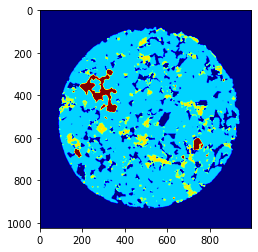

In [44]:

plt.imshow(segmented, cmap ='jet') 
plt.imsave('segmented_rock_RF_100_estim.jpg', segmented, cmap ='jet')

### Comparez l’image segmentée à la vérité terrain disponible dans « Train_masks.zip »

En visualisant notre image segmenter et la vérité terrain, nous remarquons qu'il n'a presque pas de différence, car j'ai bien les différentes régions.

**fin**